The task within this Notebook is to replicate most of the models and values from the paper:
"Does model complexity add value to asset allocation? Evidence from machine learning forecasting models"

Therefore, we extracted a dataset from the academical tool Eikon. I agreed with Dr. Markus Haas on using the STOXX Europe 600 as a benchmark and 13 out of 19 sector indizes instead of individual stocks over 36 years (without missing values).

The paper distinguishs between 
1. Shrinkage methods
2. Dimensionality reduction methods
3. Nonlinear ML methods
4. Forecast combination methods

The first step includes the importing of all necessary packages, the download of the prepared dataset, the visualization of all data and finally most importantly the general preparation of training and testing dataset (80/20). 
The idea is to use all sector indizes (X) to predict the benchmark index (y)(for now). 

In [183]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression, PLSCanonical, CCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor, VotingRegressor, StackingRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [184]:
data = pd.read_csv('data/price_data_filtered.csv', index_col=0, parse_dates=True)
data.tail()

,STOXX Europe 600,STOXX Europe Banks,STOXX Europe Financials,STOXX Europe Auto & Parts,STOXX Europe Insurance,STOXX Europe Technology,STOXX Europe Utilities,STOXX Europe Chemicals,STOXX Europe Basic Resource,STOXX Europe Con & Mat,STOXX Europe Health Care,STOXX Europe Inds Gds & Svs,STOXX Europe Media,STOXX Europe Telecoms
2021-09-01,473.123,137.105,218.459,625.259,309.675,816.033,396.884,1312.686,593.656,631.365,1040.949,779.914,360.955,240.289
2021-10-01,452.897,139.835,215.834,630.213,303.691,741.713,363.426,1248.539,540.547,581.521,986.327,737.698,351.207,228.949
2021-11-01,478.865,150.619,231.872,678.609,320.779,807.080,392.884,1316.179,564.657,617.930,1056.962,762.544,356.543,223.070
2021-12-01,470.862,139.734,220.570,656.661,310.670,812.144,389.468,1306.550,570.064,611.488,1030.112,760.739,359.789,225.157
2022-01-01,489.988,146.388,229.872,675.257,325.112,806.015,407.840,1368.250,601.215,647.029,1076.658,802.949,372.238,231.135


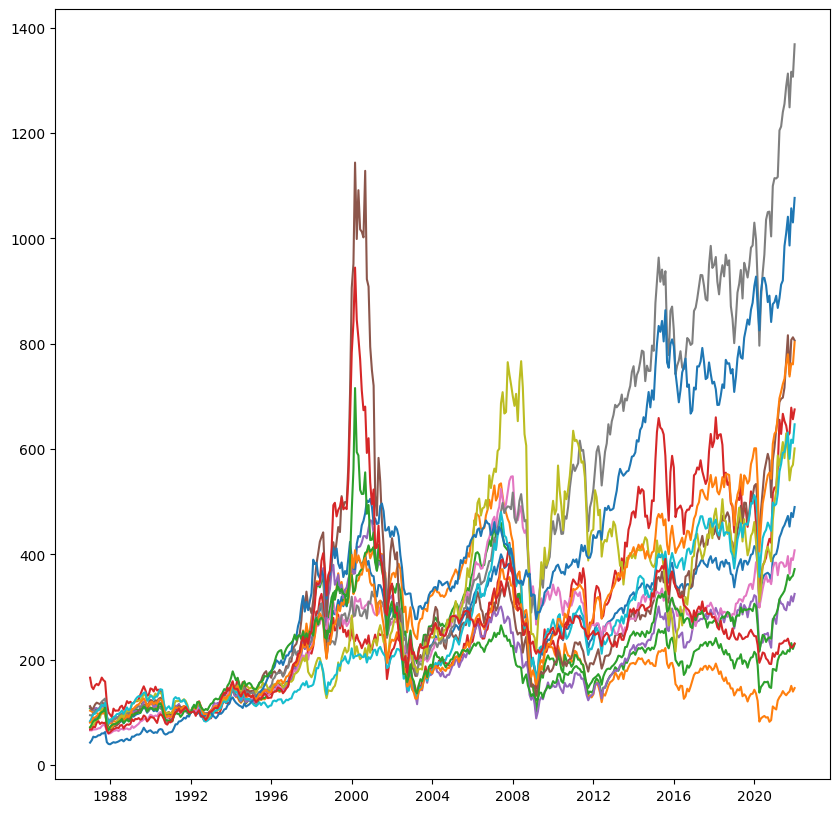

In [185]:
# plot the data
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(data.index, data, label='Price Index');

Explore the data closer. See percentage changes and introduce a rolling window.

In [186]:
# daily percentage change
data_pct_change = data.pct_change()
data_pct_change.tail(1)

# cummulative percentage change
data_pct_change_cum = (((1 + data_pct_change).cumprod()) -1) *100
data_pct_change_cum = data_pct_change_cum.dropna()
data_pct_change_cum.tail(1)

rolling = data_pct_change_cum.rolling(window=30).mean()

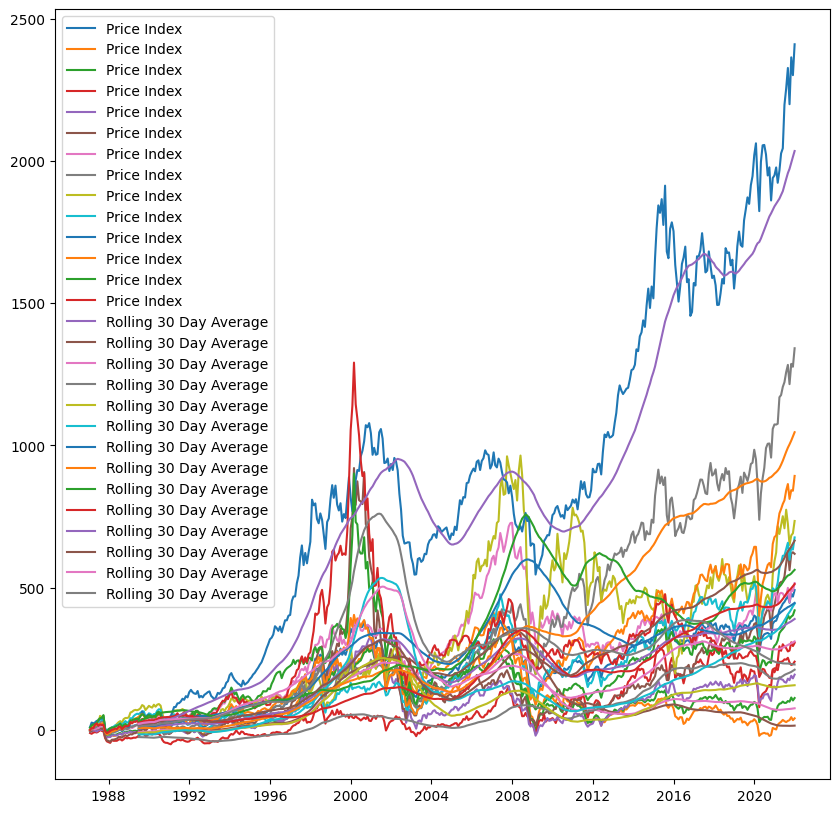

In [187]:
# visualize the data and include a rolling window average

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(data_pct_change_cum.index, data_pct_change_cum, label='Price Index')
ax.plot(data_pct_change_cum.index, rolling, label='Rolling 30 Day Average')
ax.legend();

MAIN ISSUE: SO FAR IT IS IMPOSSIBLE TU INCLUDE MORE THAN ONE VARIABLE (>1 SECTOR INDICES) AS INPUT VARIABLE TO GET BETTER MODELS TO PREDICT THE (FOR NOW) TARGET VARIABLE "BENCHMARK" INDEX. HOWEVER, THIS SHOULD BE FIXED ASAP.

In [188]:
# define the input and output variables and write a loop such that we can use the benchmark as target and the other variables as input
# include a loop to print the column names to proof that all columns are used
# Remark: this approach failes here, since the data is used for X and then overwritten by the next iteration...
#X = data.iloc[:, 1]
#y = data.iloc[:, 0].to_frame()

#X = data.iloc[:, 1].values
#y = data.iloc[:, 0].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_all = data.iloc[:, 1:]
y_all = data.iloc[:, 0].to_frame()

for x in range(0,13):
    x_name = X_all.columns[x]
    X = X_all.iloc[:, x].values.reshape(-1, 1)

    # Print column name
    print(f'Using column "{x_name}" as input variable')

    for col in range(1):
        col_name = y_all.columns[col]
        y = y_all.values
        y = y.ravel()

        # Print column name
        print(f'Using column "{col_name}" as target variable')

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using column "STOXX Europe Banks" as input variable
Using column "STOXX Europe 600" as target variable
Using column "STOXX Europe Financials" as input variable
Using column "STOXX Europe 600" as target variable
Using column "STOXX Europe Auto & Parts" as input variable
Using column "STOXX Europe 600" as target variable
Using column "STOXX Europe Insurance" as input variable
Using column "STOXX Europe 600" as target variable
Using column "STOXX Europe Technology" as input variable
Using column "STOXX Europe 600" as target variable
Using column "STOXX Europe Utilities" as input variable
Using column "STOXX Europe 600" as target variable
Using column "STOXX Europe Chemicals" as input variable
Using column "STOXX Europe 600" as target variable
Using column "STOXX Europe Basic Resource" as input variable
Using column "STOXX Europe 600" as target variable
Using column "STOXX Europe Con & Mat" as input variable
Using column "STOXX Europe 600" as target variable
Using column "STOXX Europe Heal

Since we prefined everything that is needed, we continue to develop subchapters for each method.

1. Shrinkage methods:

Linear Regression: Last actual value = 102.75, Last predicted value = 172.63687121615922
Ridge: Last actual value = 102.75, Last predicted value = 172.6368846474865
Lasso: Last actual value = 102.75, Last predicted value = 172.64539717126894
Elastic Net: Last actual value = 102.75, Last predicted value = 172.64339048263923
Lasso Lars CV: Last actual value = 102.75, Last predicted value = 172.63687121615922


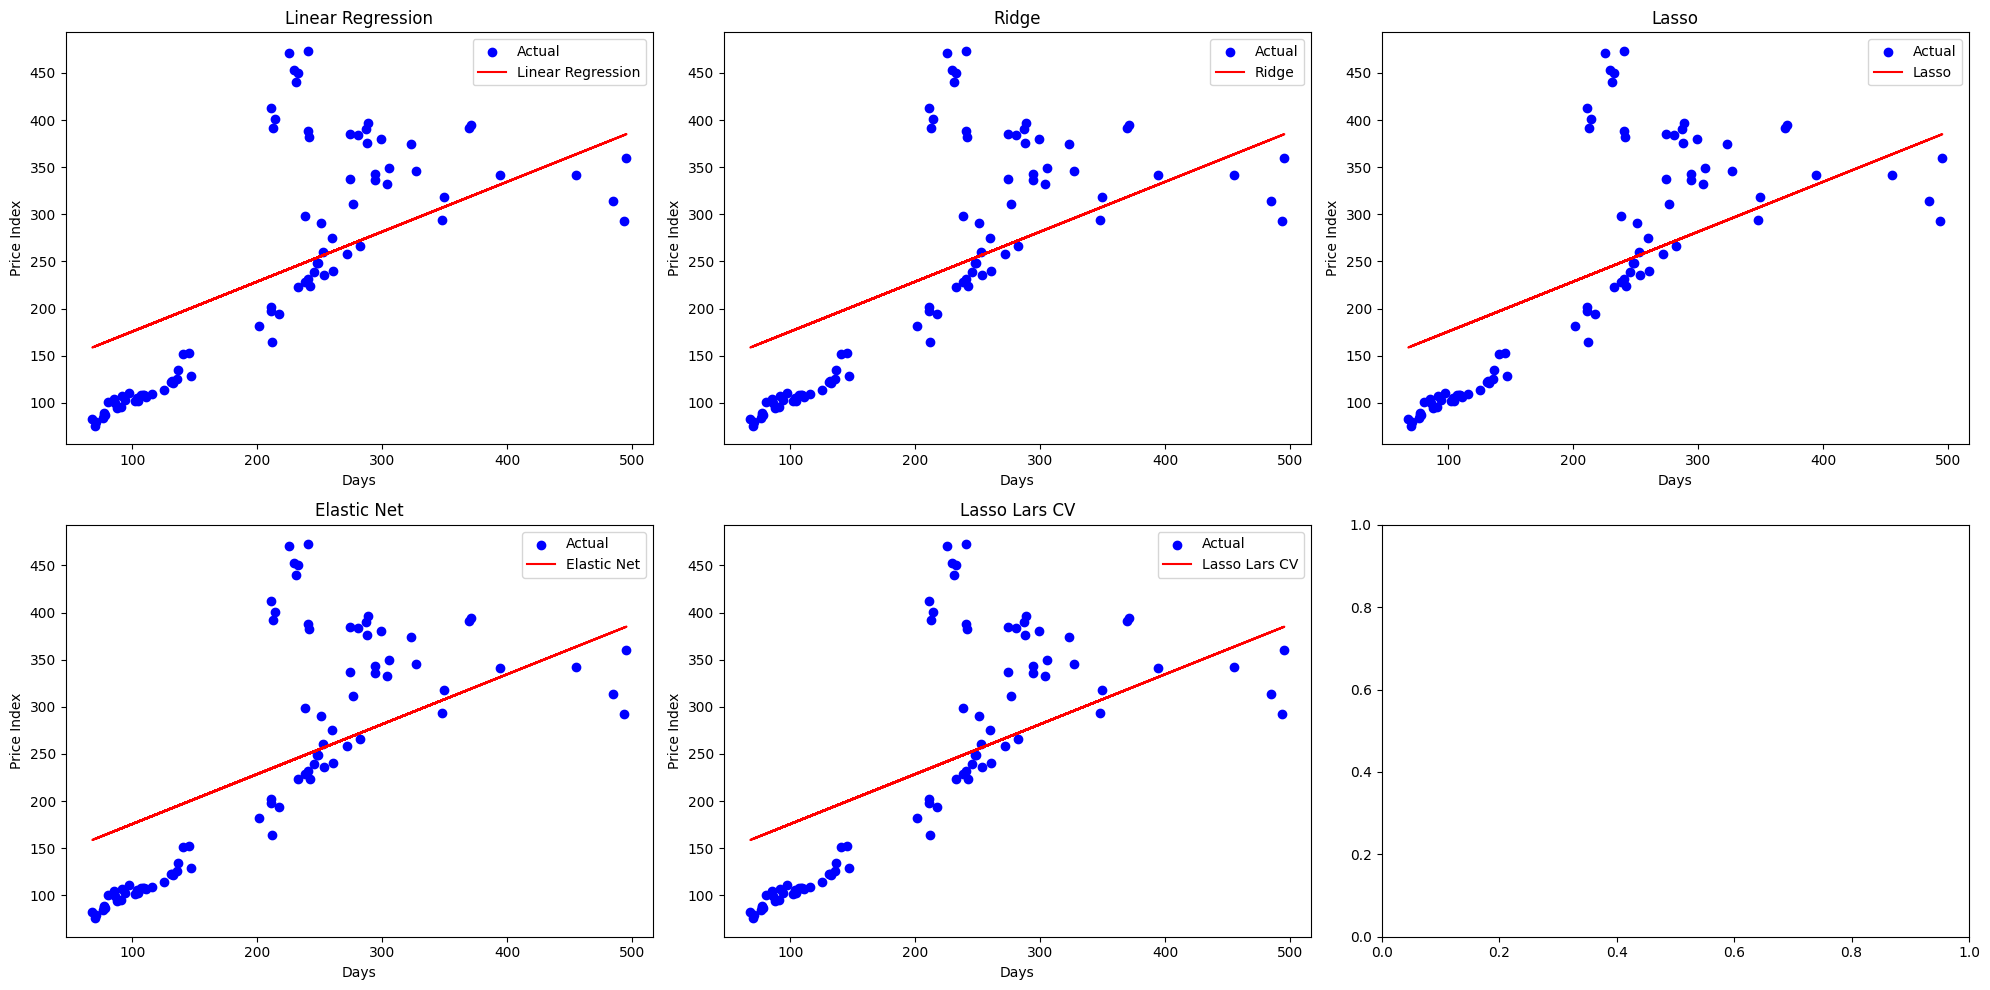

In [189]:
shrinkage_models = {'Linear Regression': LinearRegression(),
          'Ridge': Ridge(alpha=1),
          'Lasso': Lasso(alpha=1),
          'Elastic Net': ElasticNet(alpha=1, l1_ratio=0.5),
          'Lasso Lars CV': LassoLarsCV(cv=3)}

# Set up the figure and subplot axes
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

# Loop through the models and create a subplot for each
for i, (name, model) in enumerate(shrinkage_models.items()):
    # Fit the model
    y_pred = model.fit(X_train, y_train).predict(X_test)
    
    # numerical comparison
    print(f'{name}: Last actual value = {y_test[-1]}, Last predicted value = {y_pred[-1]}')

    # Plot the actual and predicted values
    ax[i].scatter(X_test, y_test, color='blue', label='Actual')
    ax[i].plot(X_test, y_pred, color='red', label=name)
    ax[i].set_xlabel('Days')
    ax[i].set_ylabel('Price Index')
    ax[i].set_title(name)
    ax[i].legend()

plt.tight_layout()
plt.show()

2. Dimensionalty reduction methods:

PLS Regression: Last actual value = 102.75, Last predicted value = [172.63687122]
PLSCanonical: Last actual value = 102.75, Last predicted value = [135.62317443]
CCA: Last actual value = 102.75, Last predicted value = [135.62317443]


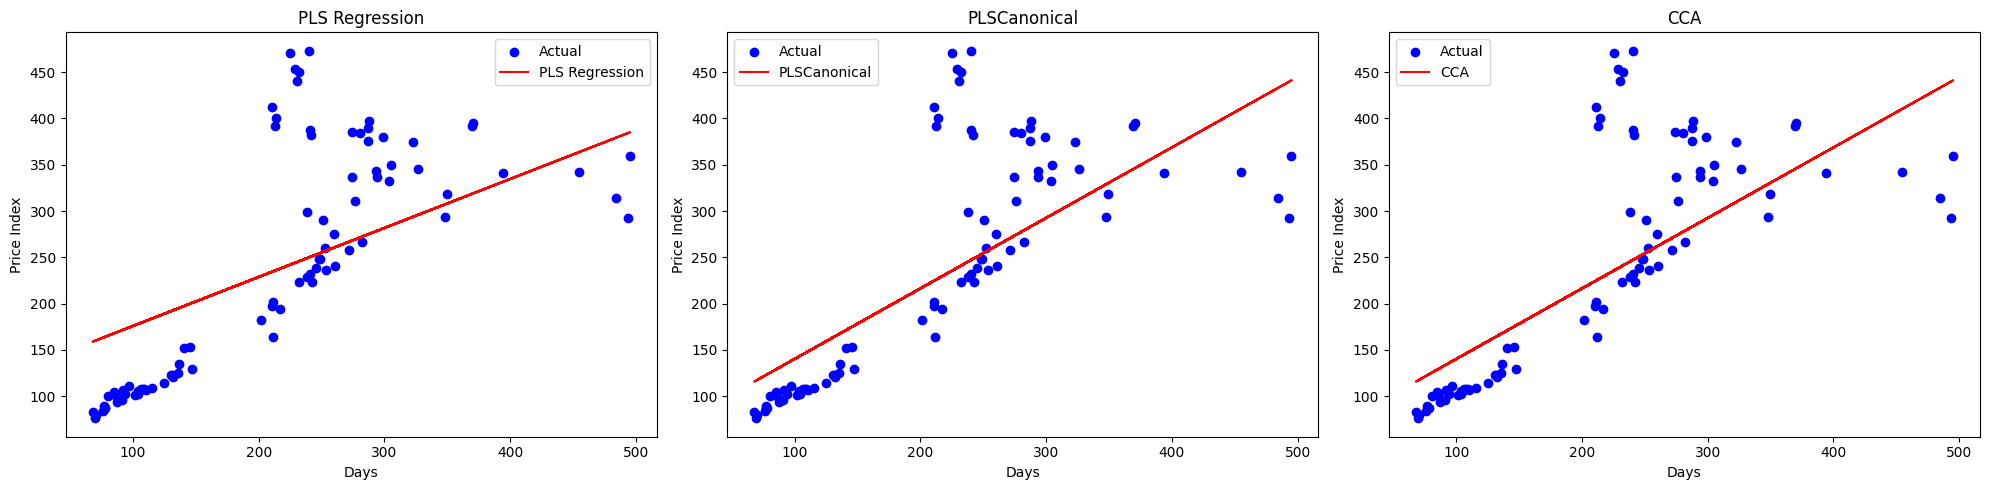

In [190]:
dimentionality_reduction_models = {'PLS Regression': PLSRegression(n_components=1),
                                    'PLSCanonical': PLSCanonical(n_components=1),
                                    'CCA': CCA(n_components=1)}

# Set up the figure and subplot axes
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax = ax.flatten()

# Loop through the models and create a subplot for each
for i, (name, model) in enumerate(dimentionality_reduction_models.items()):
    # Fit the model
    y_pred = model.fit(X_train, y_train).predict(X_test)
    
    # numerical comparison
    print(f'{name}: Last actual value = {y_test[-1]}, Last predicted value = {y_pred[-1]}')

    # Plot the actual and predicted values
    ax[i].scatter(X_test, y_test, color='blue', label='Actual')
    ax[i].plot(X_test, y_pred, color='red', label=name)
    ax[i].set_xlabel('Days')
    ax[i].set_ylabel('Price Index')
    ax[i].set_title(name)
    ax[i].legend()

plt.tight_layout()
plt.show()

Random Forest Regressor: Last actual value = 102.75, Last predicted value = 95.79905864577506
Gradient Boosting Regressor: Last actual value = 102.75, Last predicted value = 106.25084382003416
Ada Boost: Last actual value = 102.75, Last predicted value = 100.02810810810811
Extra Trees: Last actual value = 102.75, Last predicted value = 108.01539999999999
Support Vector Machine Regressor: Last actual value = 102.75, Last predicted value = 104.58733525953596


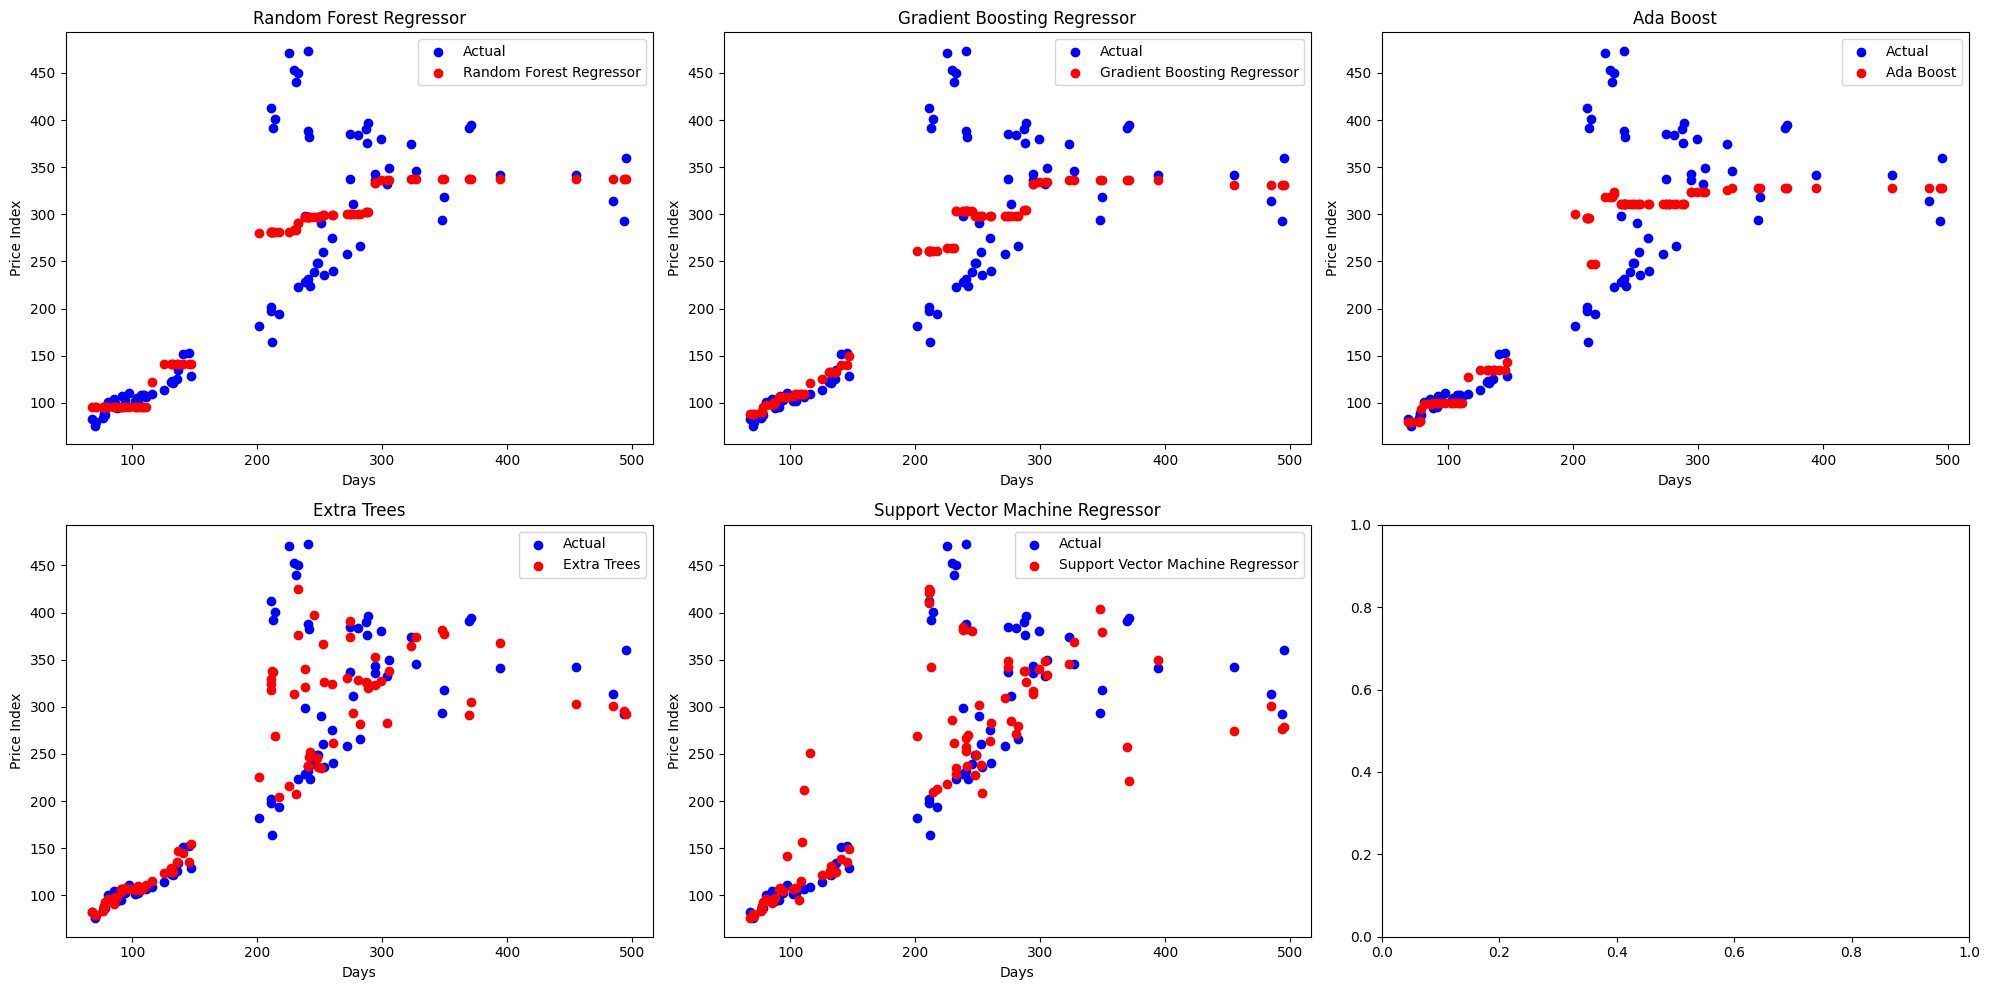

In [191]:
nonlinear_ML_models_regressor = {'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0),
                        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0),
                        'Ada Boost': AdaBoostRegressor(n_estimators=100, random_state=0),
                        'Extra Trees': ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0),
                        'Support Vector Machine Regressor': SVR(kernel='rbf', C=1e3, gamma=0.1)}

# Set up the figure and subplot axes
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

# Loop through the models and create a subplot for each
for i, (name, model) in enumerate(nonlinear_ML_models_regressor.items()):
    # Fit the model
    y_pred = model.fit(X_train, y_train).predict(X_test)
    
    # numerical comparison
    print(f'{name}: Last actual value = {y_test[-1]}, Last predicted value = {y_pred[-1]}')

    # Plot the actual and predicted values
    ax[i].scatter(X_test, y_test, color='blue', label='Actual')
    ax[i].scatter(X_test, y_pred, color='red', label=name)
    ax[i].set_xlabel('Days')
    ax[i].set_ylabel('Price Index')
    ax[i].set_title(name)
    ax[i].legend()

plt.tight_layout()
plt.show()

In [192]:
# combination_ML_models
"""
equally-weighted average of ML forecasts, also known as mean combination, is a simple ensemble method that combines the predictions of 
multiple machine learning models by taking the average of their individual predictions
"""

y_pred_linear = LinearRegression().fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_ridge = Ridge(alpha=1).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_lasso = Lasso(alpha=1).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_lasso_lars_cv = LassoLarsCV(cv=3).fit(X_train, y_train).predict(X_test).reshape(-1, 1)

# create list of models for dimensionality reduction
y_pred_pls_regression = PLSRegression(n_components=1).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_pls_canonical = PLSCanonical(n_components=1).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_cca = CCA(n_components=1).fit(X_train, y_train).predict(X_test).reshape(-1, 1)

# create list of models for nonlinear
y_pred_random_forest = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_ada_boost = AdaBoostRegressor(n_estimators=100, random_state=0).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_extra_trees = ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0).fit(X_train, y_train).predict(X_test).reshape(-1, 1)
y_pred_support_vector_machine_regressor = SVR(kernel='rbf', C=1e3, gamma=0.1).fit(X_train, y_train).predict(X_test).reshape(-1, 1)


# create mean predictions
#mean_prediction_shrinkage = np.mean([y_pred_linear, y_pred_ridge, y_pred_lasso, y_pred_elastic_net, y_pred_lasso_lars_cv], axis=0)
mean_prediction_dimensionality_reduction = np.mean([y_pred_pls_regression, y_pred_pls_canonical, y_pred_cca], axis=0)
mean_prediction_nonlinear = np.mean([y_pred_random_forest, y_pred_gradient_boosting_regressor, y_pred_ada_boost, y_pred_extra_trees, y_pred_support_vector_machine_regressor], axis=0)

Mean Combination Shrinkage: Last actual value = 102.75, Last predicted value = [172.63988295]
Mean Combination Dimensionality Reduction: Last actual value = 102.75, Last predicted value = [147.96107336]
Mean Combination Nonlinear: Last actual value = 102.75, Last predicted value = [102.93614917]


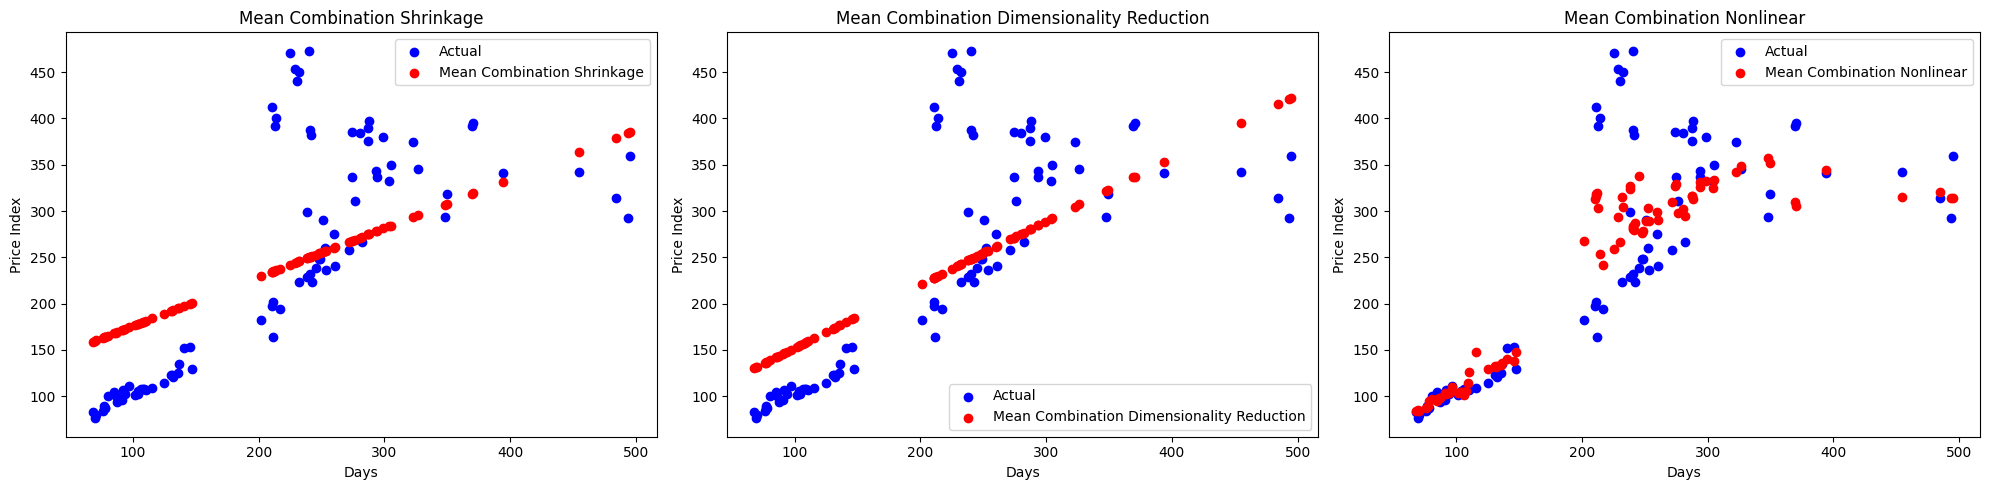

In [193]:
combination_models = {'Mean Combination Shrinkage': mean_prediction_shrinkage,
                      'Mean Combination Dimensionality Reduction': mean_prediction_dimensionality_reduction,
                      'Mean Combination Nonlinear': mean_prediction_nonlinear}

# Set up the figure and subplot axes
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax = ax.flatten()

# Loop through the models and create a subplot for each
for i, (name, model) in enumerate(combination_models.items()):
    # numerical comparison
    print(f'{name}: Last actual value = {y_test[-1]}, Last predicted value = {model[-1]}')

    # Plot the actual and predicted values
    ax[i].scatter(X_test, y_test, color='blue', label='Actual')
    ax[i].scatter(X_test, model, color='red', label=name)
    ax[i].set_xlabel('Days')
    ax[i].set_ylabel('Price Index')
    ax[i].set_title(name)
    ax[i].legend()

plt.tight_layout()
plt.show()

Finally, we should evaluate the performance of the methods and put them into a table. We use the MSE, MAE, R-squared and RMSE

In [194]:
shrinkage_predictors = {'Linear Regression': y_pred_linear, 'Ridge Regression': y_pred_ridge, 'Lasso Regression': y_pred_lasso, 'Elastic Net': y_pred_elastic_net, 'Bridge regression': y_pred_lasso_lars_cv}
mse_dict_sh = {}
mae_dict_sh = {}
r2_dict_sh = {}
for name, y_pred in shrinkage_predictors.items():
    mse_dict_sh[name] = mean_squared_error(y_test, y_pred)
    mae_dict_sh[name] = mean_absolute_error(y_test, y_pred)
    r2_dict_sh[name] = r2_score(y_test, y_pred)

# Create a DataFrame from the dictionaries and set index name
shrinkage_performance = pd.DataFrame.from_dict({'MSE': mse_dict_sh, 'MAE': mae_dict_sh, 'R2': r2_dict_sh})
shrinkage_performance.index.name = 'Model'

shrinkage_performance

,MSE,MAE,R2
Model,,,
Linear Regression,7704.786726,72.051298,0.483826
Ridge Regression,7704.787361,72.051302,0.483826
Lasso Regression,7705.190119,72.054313,0.483799
Elastic Net,7705.095169,72.053603,0.483805
Bridge regression,7704.786726,72.051298,0.483826


In [195]:
dimentionality_reduction_predictors = {'PLS Regression': y_pred_pls_regression, 'PLS Canonical': y_pred_pls_canonical, 'CCA': y_pred_cca}
mse_dict_di = {}
mae_dict_di = {}
r2_dict_di = {}
for name, y_pred in dimentionality_reduction_predictors.items():
    mse_dict_di[name] = mean_squared_error(y_test, y_pred)
    mae_dict_di[name] = mean_absolute_error(y_test, y_pred)
    r2_dict_di[name] = r2_score(y_test, y_pred)

# Create a DataFrame from the dictionaries and set index name
dimentionality_reduction_performance = pd.DataFrame.from_dict({'MSE': mse_dict_di, 'MAE': mae_dict_di, 'R2': r2_dict_di})
dimentionality_reduction_performance.index.name = 'Model'

dimentionality_reduction_performance

,MSE,MAE,R2
Model,,,
PLS Regression,7704.786726,72.051298,0.483826
PLS Canonical,6625.303075,59.780085,0.556145
CCA,6625.303075,59.780085,0.556145


In [196]:
nonlinear_ML_predictors = {'Random Forest': y_pred_random_forest, 'Gradient Boosting Regressor': y_pred_gradient_boosting_regressor, 'Ada Boost': y_pred_ada_boost, 'Extra Trees': y_pred_extra_trees, 'Support Vector Machine Regressor': y_pred_support_vector_machine_regressor}
mse_dict_no = {}
mae_dict_no = {}
r2_dict_no = {}
for name, y_pred in nonlinear_ML_predictors.items():
    mse_dict_no[name] = mean_squared_error(y_test, y_pred)
    mae_dict_no[name] = mean_absolute_error(y_test, y_pred)
    r2_dict_no[name] = r2_score(y_test, y_pred)

# Create a DataFrame from the dictionaries and set index name
nonlinear_ML_performance = pd.DataFrame.from_dict({'MSE': mse_dict_no, 'MAE': mae_dict_no, 'R2': r2_dict_no})
nonlinear_ML_performance.index.name = 'Model'

nonlinear_ML_performance

,MSE,MAE,R2
Model,,,
Random Forest,4074.701667,44.452997,0.727020
Gradient Boosting Regressor,4236.967638,43.150391,0.716149
Ada Boost,3818.916615,44.042860,0.744156
Extra Trees,5950.198142,48.262697,0.601373
Support Vector Machine Regressor,7796.813533,55.191981,0.477661
